# COCO format optimizer for MMdetection

## Correction format

In [8]:
import json
import os

# Load the provided JSON file
with open('cup.json', 'r') as f:
    data = json.load(f)

# Extract unique directory paths from 'images'
unique_dirs = set(os.path.dirname(image['path']) for image in data['images'])

# Print the unique directory paths
for directory in unique_dirs:
    print(directory)


/datasets/cup


# File import

In [11]:
import json
import pprint

# Load the provided JSON file
with open('cup.json', 'r') as f:
    data = json.load(f)

# Define the old and new paths
old_path = '/datasets/cup/'
new_path = '/data/cup/'

# Convert 'path' to 'file_name' in 'images' and change the path
for image in data['images']:
    image['file_name'] = image.pop('path').replace(old_path, new_path)

# Remove 'isbbox' from 'annotations'
for annotation in data['annotations']:
    annotation.pop('isbbox', None)

# Remove 'supercategory' and 'color' from 'categories'
for category in data['categories']:
    category.pop('supercategory', None)
    category.pop('color', None)

# Save the converted data to a new JSON file
with open('converted.json', 'w') as f:
    json.dump(data, f)

# Print an example from the converted data
pprint.pprint(data['images'][0])  # Print the first image
pprint.pprint(data['annotations'][0])  # Print the first annotation
pprint.pprint(data['categories'][0])  # Print the first category


{'annotated': True,
 'annotating': [],
 'category_ids': [1],
 'dataset_id': 1,
 'events': [],
 'file_name': '/data/cup/0a2c2e78-pass_0080180.png',
 'height': 512,
 'id': 1,
 'is_modified': False,
 'metadata': {},
 'milliseconds': 0,
 'num_annotations': 1,
 'regenerate_thumbnail': False,
 'width': 512}
{'area': 2360,
 'bbox': [0, 0, 59, 40],
 'category_id': 1,
 'color': '#db12b6',
 'creator': 'askengi',
 'dataset_id': 1,
 'events': [{'_cls': 'SessionEvent',
             'created_at': {'$date': 1689829537429},
             'milliseconds': 9509,
             'tools_used': ['BBox'],
             'user': 'askengi'}],
 'height': 512,
 'id': 136,
 'image_id': 1,
 'iscrowd': False,
 'metadata': {},
 'milliseconds': 9509,
 'segmentation': [[-0.9, 39.5, -0.9, 0.3, 58.9, 0.3, 58.9, 39.5]],
 'width': 512}
{'creator': 'askengi',
 'id': 1,
 'keypoint_colors': [],
 'metadata': {},
 'name': 'Furyo'}


# Correction Result Check

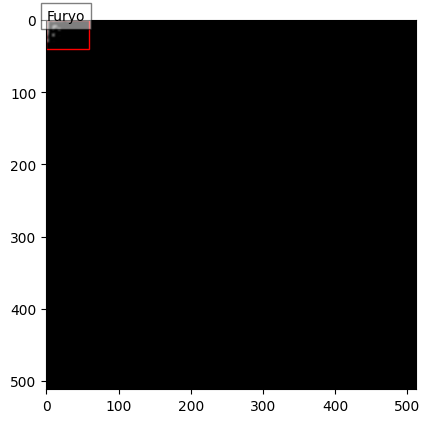

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os

# Load the converted JSON file
with open('converted.json', 'r') as f:
    data = json.load(f)

# Get the first image information
first_image = data['images'][0]
first_annotation = data['annotations'][0]

# Get the category name for the first annotation
category_id = first_annotation['category_id']
category_name = next((category['name'] for category in data['categories'] if category['id'] == category_id), None)

# Open the image file
im = np.array(Image.open('data/cup/' + os.path.basename(first_image['file_name'])), dtype=np.uint8)

# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch for the bounding box
# Bounding box format in the JSON is [x, y, width, height]
bbox = patches.Rectangle((first_annotation['bbox'][0], first_annotation['bbox'][1]), 
                         first_annotation['bbox'][2], first_annotation['bbox'][3], 
                         linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(bbox)

# Add the category name to the image
plt.text(first_annotation['bbox'][0], first_annotation['bbox'][1], category_name, 
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


# End